## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



<br>

## Introduction

***

There are a number of steps involved in creating a model that predicts wind turbine power as accurately as possible. This project follows these steps, providing explanations for the choice of model used through analysis of the data in the *powerproduction* data set. With this in mind, it is divided into the following sections:

* Preliminary Analysis
* Function Approximation (Regression vs Classification)
* Regression with `scikit-learn`
* Regression with `keras`
* Model evaluation

<br>



## 1. Preliminary Analysis

***

First, I import the modules needed and choose a style for visualisation throughout the project:

* `numpy` is a python library which allows us to work with arrays, more suited to data analysis than traditional python `lists` [1] 
* `pandas` is suited to working with data sets and provides the DataFrame structure to make this more effective and efficient [2]. 
* `matplotlib.pyplot` is used for visualisation. It is a graph plotting library on which many visualisation packages are built in python. The `pyplot` submodule contains most of matplotlib's utilities [3]
* With the `scikit-learn` library, we have access to numerous machine learning algorithms [4]. In this project it is used to generate predictive models and also to evaluate those models. 
* `tensorflow` is a machine learning platform with a focus on working with and training neural networks [5]. `keras` is an API built on tensorflow, providing an interface for working with neural networks [6].

In [40]:
# Working with arrays
import numpy as np

# Working with dataframes
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Linear regression algorithm
from sklearn.linear_model import LinearRegression

# Working with more complex variable relationships
from sklearn.preprocessing import PolynomialFeatures

# Metrics for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Working with neural networks
import tensorflow.keras as kr

In [35]:
# Plot style
plt.style.use('fivethirtyeight')

# Plot size
plt.rcParams['figure.figsize'] = [11, 6]

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to `pp` and output the first 10 rows. With `pandas.describe` we get a statistical summary of the data set:

In [36]:
# Read in data set
pp = pd.read_csv('powerproduction.csv')

# Output first 10 rows
pp.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [37]:
# Output summary statistics of data set
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The data set contains two continuous variables. To get an overview of the relationship between them, we can plot them using a scatterplot. Visualising this relationship is a useful first step in understanding what predictive model might be suitable. It can also offer other insights, such as the presence of outliers: 

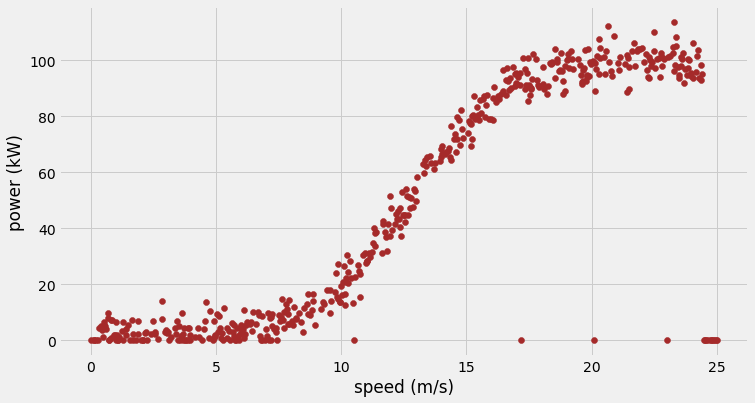

In [39]:
# Plot data on a scatter plot
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')
plt.scatter(pp['speed'], pp['power'], color='brown', marker='o')

#### Wind Turbine Power Curve
This plot produces a visualisation of the typical wind turbine power curve. The *cut-in* wind speed is at approximately 7m/s, below which the turbine is producing hardly any power. Between wind speeds of approximately 7 and 17m/s the power ramps up to what is known as the *rated power capacity*. From approximate speeds of 17m/s the power generated remains constant, right up to 25m/s, or the *cut-out* wind speed. While there is much potential power in the wind speed above the cut-out speed, the cost of making the turbine capable of producing power under these conditions outweights the benefits of more power being generated [7]. <br>

#### Outliers
What is also notable from the plot is the presence of seeming outliers in the data. There are a number of observations where no power is being generated despite sufficiently high wind speeds. This is something which will be examined in greater detail below.

#### What Predictive Model?
Through visualisation we can get a preliminary indication of what model might best be suited when predicting power output from wind speed. Initial inclinations would suggest that this is a *regression* problem. Given that there are only two variables in the data set, simple linear regression may be an appropriate model although fitting a straight line to the data may not yield the most accurate predictions. It might be more suitable to fit a curve. The variables are clearly *positively* correlated between the *cut-in* and *cut-out* speeds. 

<br>



## 2. Function Approximation: Classification vs Regression

***

*Function approximation* is the term used to describe the problem of approximating a mapping function from input variables to output variables. Generally speaking, function approximation problems can be divided into *classification* and *regression* tasks [8]. Deciding between which of these is most appropriate for the current project is the next step.

#### Classification vs Regression
"Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y)" [9], while the output variables for regression models are continuous numeric variables. The aim of the current project is to predict power output from wind speed. As noted above, this is a continuous numeric variable which tells us that regression is an appropriate model/function for this task.

#### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [10]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [11]. Taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.



<br>



## 3. Regression with `scikit-learn`

***

#### Simple linear regression

Simple linear regression is "... the simplest case of linear regression with a single independent variable" [12]. The *powerproduction* data set contains one independent variable (speed) and one dependent variable (power).  function imported from Python's Scikit-learn library to produce a model. Simple linear regression can be applied when the data set contains only two variables - a dependent and independent variable. This is a condition which is filled by the 'powerproduction' data set.

<br>



<br>

First, the data set is split into two separate columns in order to train the model.

In [6]:
# Create a new dataset containing only values from the speed column and print output
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [7]:
# Create a new dataset containing only values from the power column and print output 
power_df = pp.drop('speed',axis='columns')
power_df

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


<br>

Next, I create an instance of the LinearRegression() class and call the `fit` method, passing the speed and power dataframes as arguments. 

In [8]:
# Create an instance of the LinearRegression() class
reg = LinearRegression()

# Fit our data to the model
reg.fit(speed_df, power_df)

LinearRegression()

Once this is done, we can now test the model for accuracy. We can do this by calling a number of methods provided by the functionality of the `LinearRegresssion()` class.

<br>

First, I take a pick a value for speed and pass it to the `.predict` method

In [9]:
# Predict method using a value for speed
email = 10.89
arr = reg.predict([[9.746]])

<br>

Next, I call the `intercept_` method to determine where the line intercepts the y-axis. And below that I use call `coef_` to get the slope of the line. This gives us all the values for formula for the best-fitting line: $$y = mx + b$$ where m is the slope, b is the y-interept and x is the independent variable [3].

[3] dummies.com; How to calculate a regression line; https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/ <br>

In [10]:
# Call the intercept_ method to determine where the line intercepts the y-axis
reg.intercept_

array([-13.89990263])

In [11]:
# Call the coef_ method to calculate the slope of the line
reg.coef_

array([[4.91759567]])

In [12]:
# Set calculated values
m = 4.91759567
x = 9.746
b = -13.899902630519641

y = m*x + b
print(y)

34.02698476930036


As expected, we get the same result for y when we input these values into the formula (above)
<br>



### R-squared 

The `LinearRegression` class also provides functionality for calculating the the R-squared value. The R-squared value is a 'goodness-of-fit' measure which can give us an indication as to the accuracy of our regression model. The best possible score is 1.0, while a score of 0 or a negative value generally represents a worse-fitting line. The R-squared value "indicates the percentage of the variance in the dependent variable that the independent variables explain collectively." [4] It is worth noting that a high R-squared does not necessarily always indicate the best fit [5].

[4] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[5] *Ibid*

In [13]:
# Calculate R-squared value
reg.score(speed_df, power_df)

0.7289360258564072

<br>


***

### Train_test_split

The train-test-split procedure involves training a machine learning algorithm by splitting the data into separate proportions. One proportion (train) is used to train the model while the other (test) is held back in order to test its accuracy. (It is worth pointing out that it may not always be appropriate as a technique to increase accuracy of prediction e.g. if the data set is too small [6].) 

<br>

Below, I pass the speed_df and power_df dataframes to the `train_test_split` method and set the parameter *test_size* to 0.2. The test size indicates the size of the train and test sets. Common split percentages include 
* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50% [7]


[6] machinelearningmastery.com; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[7] *Ibid*

In [14]:
# Call train_test_split method on dataframes
A_Train, A_Test, B_Train, B_Test = train_test_split(speed_df, power_df, test_size = 0.2)

In [15]:
pp = pp[pp.power != 0]


In [16]:
x = pp['speed']
y = pp['power']

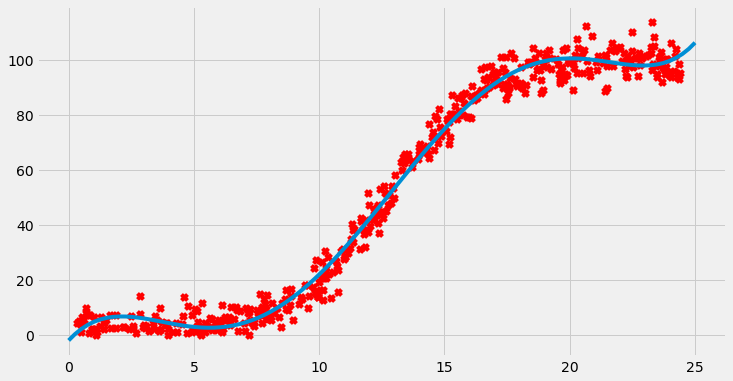

In [17]:
mymodel = np.poly1d(np.polyfit(x, y, 6))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()


## Neural network - Regression

***

In [18]:
pp = pp[pp.power != 0]
pp.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [19]:
# Create neural network with one neuron
def create_model():
    model = kr.models.Sequential()
    model.add(kr.Input(shape=(1,)))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
    
    return model

In [20]:
model = create_model()

In [21]:


msk = np.random.rand(len(pp)) < 0.5
train = pp[msk]

test = pp[~msk]

In [22]:
model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
24/24 [==============================] - 2s 2ms/step - loss: 3989.2610
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 2068.3020
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 693.9557
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 253.1151
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 264.2258
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 259.2344
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 252.5438
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 227.4478
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 239.8713
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 233.4289
Epoch 11/500
24/24 [==============================] - 0s 3ms/step - loss: 235.9138
Epoch 12/500
24/24 [==============================] - 0s 3ms/step - loss: 239.6304
Epoch 13/50

24/24 [==============================] - 0s 3ms/step - loss: 72.8152
Epoch 101/500
24/24 [==============================] - 0s 3ms/step - loss: 91.3380
Epoch 102/500
24/24 [==============================] - 0s 3ms/step - loss: 90.0424
Epoch 103/500
24/24 [==============================] - 0s 3ms/step - loss: 93.5991
Epoch 104/500
24/24 [==============================] - 0s 3ms/step - loss: 80.9186
Epoch 105/500
24/24 [==============================] - 0s 3ms/step - loss: 86.8924
Epoch 106/500
24/24 [==============================] - 0s 3ms/step - loss: 93.4139
Epoch 107/500
24/24 [==============================] - 0s 3ms/step - loss: 83.9487
Epoch 108/500
24/24 [==============================] - 0s 3ms/step - loss: 86.3670
Epoch 109/500
24/24 [==============================] - 0s 3ms/step - loss: 110.3023
Epoch 110/500
24/24 [==============================] - 0s 3ms/step - loss: 73.4073
Epoch 111/500
24/24 [==============================] - 0s 3ms/step - loss: 72.3891
Epoch 112/500
24/

24/24 [==============================] - 0s 3ms/step - loss: 56.8886
Epoch 199/500
24/24 [==============================] - 0s 3ms/step - loss: 46.8098
Epoch 200/500
24/24 [==============================] - 0s 3ms/step - loss: 61.2537
Epoch 201/500
24/24 [==============================] - 0s 3ms/step - loss: 54.0797
Epoch 202/500
24/24 [==============================] - 0s 3ms/step - loss: 46.3561
Epoch 203/500
24/24 [==============================] - 0s 3ms/step - loss: 53.4678
Epoch 204/500
24/24 [==============================] - 0s 3ms/step - loss: 57.9242
Epoch 205/500
24/24 [==============================] - 0s 3ms/step - loss: 47.0535
Epoch 206/500
24/24 [==============================] - 0s 3ms/step - loss: 43.4883
Epoch 207/500
24/24 [==============================] - 0s 3ms/step - loss: 46.6211
Epoch 208/500
24/24 [==============================] - 0s 3ms/step - loss: 41.4457
Epoch 209/500
24/24 [==============================] - 0s 3ms/step - loss: 48.5627
Epoch 210/500
24/2

24/24 [==============================] - 0s 3ms/step - loss: 27.7656
Epoch 297/500
24/24 [==============================] - 0s 3ms/step - loss: 26.8527
Epoch 298/500
24/24 [==============================] - 0s 3ms/step - loss: 34.8226
Epoch 299/500
24/24 [==============================] - 0s 3ms/step - loss: 28.1699
Epoch 300/500
24/24 [==============================] - 0s 3ms/step - loss: 22.8797
Epoch 301/500
24/24 [==============================] - 0s 3ms/step - loss: 22.2515
Epoch 302/500
24/24 [==============================] - 0s 3ms/step - loss: 24.2193
Epoch 303/500
24/24 [==============================] - 0s 3ms/step - loss: 27.3399
Epoch 304/500
24/24 [==============================] - 0s 3ms/step - loss: 27.2873
Epoch 305/500
24/24 [==============================] - 0s 3ms/step - loss: 24.2570
Epoch 306/500
24/24 [==============================] - 0s 3ms/step - loss: 25.1275
Epoch 307/500
24/24 [==============================] - 0s 3ms/step - loss: 24.7802
Epoch 308/500
24/2

24/24 [==============================] - 0s 3ms/step - loss: 22.4947
Epoch 395/500
24/24 [==============================] - 0s 3ms/step - loss: 22.4239
Epoch 396/500
24/24 [==============================] - 0s 3ms/step - loss: 17.1277
Epoch 397/500
24/24 [==============================] - ETA: 0s - loss: 18.13 - 0s 3ms/step - loss: 18.2838
Epoch 398/500
24/24 [==============================] - 0s 3ms/step - loss: 20.2950
Epoch 399/500
24/24 [==============================] - 0s 3ms/step - loss: 17.8921
Epoch 400/500
24/24 [==============================] - 0s 3ms/step - loss: 19.4423
Epoch 401/500
24/24 [==============================] - 0s 3ms/step - loss: 23.0627
Epoch 402/500
24/24 [==============================] - 0s 3ms/step - loss: 17.7901
Epoch 403/500
24/24 [==============================] - 0s 3ms/step - loss: 18.1744
Epoch 404/500
24/24 [==============================] - 0s 3ms/step - loss: 16.8756
Epoch 405/500
24/24 [==============================] - 0s 2ms/step - loss: 17

24/24 [==============================] - 0s 3ms/step - loss: 19.9853
Epoch 493/500
24/24 [==============================] - 0s 3ms/step - loss: 20.4158
Epoch 494/500
24/24 [==============================] - 0s 3ms/step - loss: 18.4958
Epoch 495/500
24/24 [==============================] - 0s 3ms/step - loss: 15.5668
Epoch 496/500
24/24 [==============================] - 0s 3ms/step - loss: 18.4752
Epoch 497/500
24/24 [==============================] - 0s 3ms/step - loss: 16.8650
Epoch 498/500
24/24 [==============================] - 0s 3ms/step - loss: 22.5305
Epoch 499/500
24/24 [==============================] - 0s 3ms/step - loss: 17.0818
Epoch 500/500
24/24 [==============================] - 0s 3ms/step - loss: 15.7769


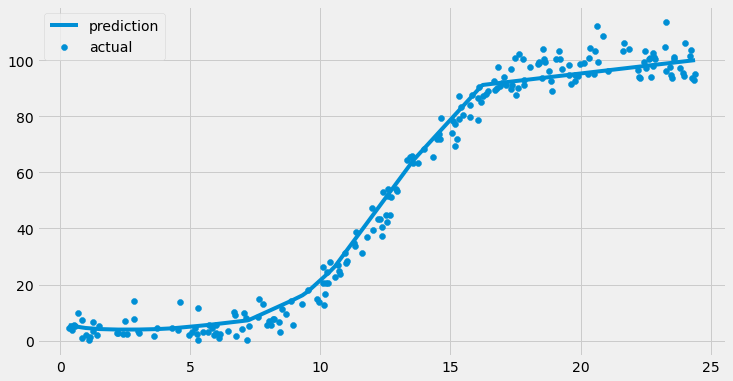

In [23]:
plt.scatter(test['speed'], test['power'], label='actual')
plt.plot(test['speed'], model.predict(test['speed']), label='prediction')
plt.legend()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.save('my_model.h5')

In [26]:
model.predict([14])

array([[68.67065]], dtype=float32)

In [27]:
lin_x = pp.speed[:, np.newaxis]
lin_y = pp.power[:, np.newaxis]

<ipython-input-27-5eafad447be6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lin_x = pp.speed[:, np.newaxis]
<ipython-input-27-5eafad447be6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lin_y = pp.power[:, np.newaxis]


In [28]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(lin_x)

In [29]:
lin_model = LinearRegression()
lin_model.fit(x_poly, lin_y)
y_poly_pred = lin_model.predict(x_poly)

In [30]:

rmse = np.sqrt(mean_squared_error(lin_y,y_poly_pred))
r2 = r2_score(lin_y,y_poly_pred)
print(rmse)
print(r2)

4.438058874744193
0.9879782627661895


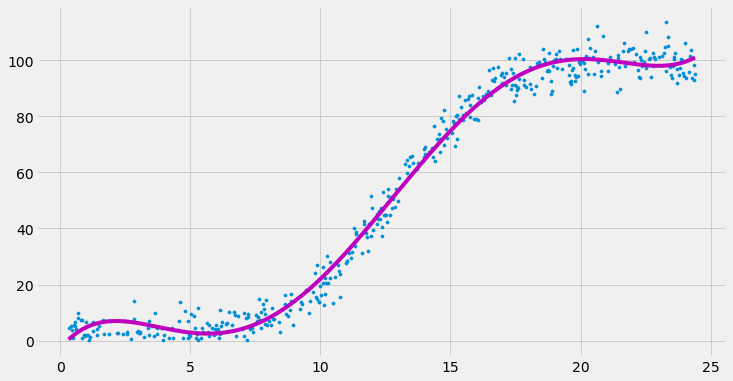

In [31]:

plt.scatter(lin_x, lin_y, s=10)
# sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
# x, y_poly_pred = zip(*sorted_zip)
plt.plot(lin_x, y_poly_pred, color='m')
plt.show()

In [32]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

10.120437473614711
0.8537647164420812


### References

[1] w3schools.com; Numpy Introduction; https://www.w3schools.com/python/numpy_intro.asp <br>
[2] w3schools.com; Pandas Tutorial https://www.w3schools.com/python/pandas_tutorial.asp <br>
[3] w3schools.com; Matplotlib Pyplot; https://www.w3schools.com/python/matplotlib_pyplot.asp <br>
[4] wikipedia.org; scikit_learn https://en.wikipedia.org/wiki/Scikit-learn <br>
[5] tensorflow.org; https://www.tensorflow.org/ <br>
[6] keras.io; https://keras.io/ <br>
[7] youtube.com; Wind Turbine Power Curve description; https://www.youtube.com/watch?v=8tNOL4ZL9Do <br>
[8] Brownlee, J.; Difference Between Classification and Regression in Machine Learning https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/ <br>
[9] *Ibid*
[10] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[11] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>
[12] realpython.com; Linear Regression in Python; https://realpython.com/linear-regression-in-python/ <br>